**3. Do events or holidays affect the price?**<br>

Null Hypothesis: Events and holidays do not affect the price (x_mean - y_mean = 0)<br>
Alternate Hypothesis : Events and holidays affect the price (x_mean - y_mean != 0)<br>

We process the data to analyze three cases<br>
1. AllEventMonthPrices vs AllNonEventMonthPrices<br>
2. XmasMonthEventPrice vs PreviousNonEventMonthPrice/AllNonEventMonthPrices<br>
3. MarathonMonthEventPrice vs PreviousNonEventMonthPrice/AllNonEventMonthPrices<br>


In [342]:
import os
import csv
import glob
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

number_of_bookings_012017    32173
number_of_bookings_022017    65655
number_of_bookings_032017    18123
number_of_bookings_042017    63796
number_of_bookings_052017    38924
number_of_bookings_062017    73968
number_of_bookings_072017    43443
number_of_bookings_082017    82209
number_of_bookings_092017    44846
number_of_bookings_102017    87707
number_of_bookings_112017    48685
number_of_bookings_122017    89885
dtype: int64
[32173, 65655, 18123, 63796, 38924, 73968, 43443, 82209, 44846, 87707, 48685, 89885]


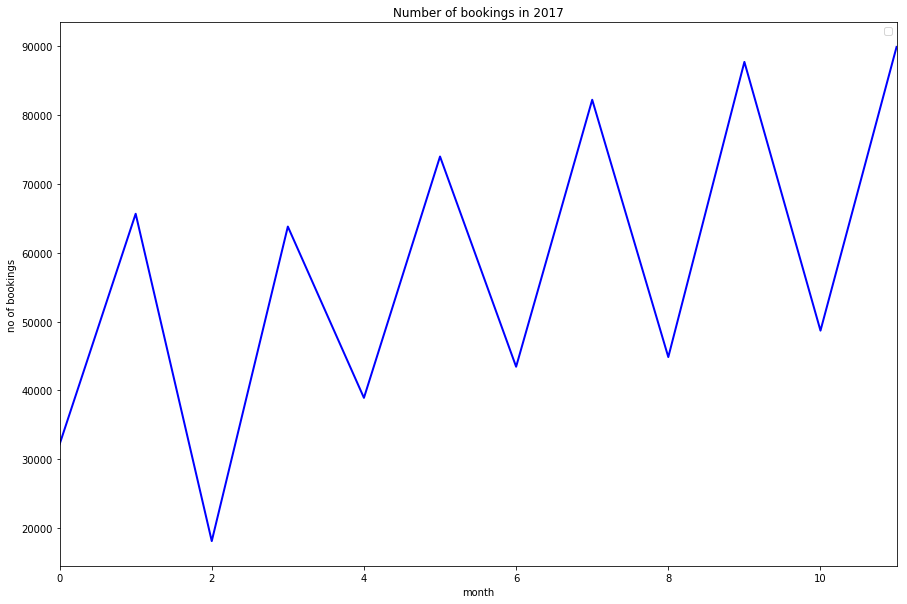

In [332]:
cols = ['number_of_reviews_122016','number_of_reviews_012017','number_of_reviews_022017','number_of_reviews_032017','number_of_reviews_042017',
       'number_of_reviews_052017','number_of_reviews_062017','number_of_reviews_072017','number_of_reviews_082017',
       'number_of_reviews_092017','number_of_reviews_102017','number_of_reviews_112017','number_of_reviews_122017']
path1 = 'data2/booking.csv'
df = pd.read_csv(path1,sep=',',usecols=cols)
newdf = pd.DataFrame()
newdf['number_of_bookings_012017'] = (df['number_of_reviews_012017'] - df['number_of_reviews_122016']).clip_lower(0)
newdf['number_of_bookings_022017'] = (df['number_of_reviews_022017'] - df['number_of_reviews_012017']).clip_lower(0)
newdf['number_of_bookings_032017'] = (df['number_of_reviews_032017'] - df['number_of_reviews_022017']).clip_lower(0)
newdf['number_of_bookings_042017'] = (df['number_of_reviews_042017'] - df['number_of_reviews_032017']).clip_lower(0)
newdf['number_of_bookings_052017'] = (df['number_of_reviews_052017'] - df['number_of_reviews_042017']).clip_lower(0)
newdf['number_of_bookings_062017'] = (df['number_of_reviews_062017'] - df['number_of_reviews_052017']).clip_lower(0)
newdf['number_of_bookings_072017'] = (df['number_of_reviews_072017'] - df['number_of_reviews_062017']).clip_lower(0)
newdf['number_of_bookings_082017'] = (df['number_of_reviews_082017'] - df['number_of_reviews_072017']).clip_lower(0)
newdf['number_of_bookings_092017'] = (df['number_of_reviews_092017'] - df['number_of_reviews_082017']).clip_lower(0)
newdf['number_of_bookings_102017'] = (df['number_of_reviews_102017'] - df['number_of_reviews_092017']).clip_lower(0)
newdf['number_of_bookings_112017'] = (df['number_of_reviews_112017'] - df['number_of_reviews_102017']).clip_lower(0)
newdf['number_of_bookings_122017'] = (df['number_of_reviews_122017'] - df['number_of_reviews_112017']).clip_lower(0)

total = newdf.apply(np.sum)
print total
print total.tolist()


#plot predicted and true values for 5th day
plt.figure(figsize=(15,10))
plt.xlabel("month")
plt.ylabel("no of bookings")
plt.plot(total.tolist(),linewidth=2,c="blue")
plt.xlim(0,11)
plt.legend()
plt.title("Number of bookings in 2017")
plt.show()









In [333]:
months_2015 = ['9','10','11','12']
months = ['10','11','12']
event = []
non_event = []
month_2015=[]
month_2016=[]
month_2017=[]
n2015 = {}
n2016 = {}
n2017 = {}
xmas = []
noneventmonth = []
nov_marathon = []
alleventdf = pd.DataFrame()
allnoneventdf = pd.DataFrame()
xmasdf = pd.DataFrame()
non_eventdf = pd.DataFrame()
nov_marathondf = pd.DataFrame()
boroughs = ['Manhattan','Bronx','Staten Island','Queens','Brooklyn']
for year in (2015,2016,2017):
    path = "data2/"+str(year)
    if os.path.exists(path):
        cols = ['id','price','neighbourhood_group_cleansed','room_type']
        allFiles = glob.glob(os.path.join(path,"*.csv"))
        
        for file_ in allFiles:
            iter_csv = pd.read_csv(file_, iterator=True, chunksize=1000, usecols = cols)
            df = pd.concat([chunk[chunk['neighbourhood_group_cleansed'].isin(boroughs)] for chunk in iter_csv])
            listings_count = len(df.index)
            
            #preprocess price
            df = df[df.price != 0]
            #df = df[df.room_type == 'Entire home/apt']
            df['price'] = df['price'].replace('[\$,)]','',regex=True).replace('[(]','-', regex=True).astype(float)
            df = df.dropna(axis=0)
            totalprice = df['price'].tolist()
            
            ''' 
            #get no of reviews
            if year == 2015:
                n2015[month] = df['number_of_reviews'].sum()
            elif year == 2016:
                n2016[month] = df['number_of_reviews'].sum()
            elif year == 2017:
                n2017[month] = df['number_of_reviews'].sum()
            '''
            #get month
            filename = file_.split('.')[0]
            month = filename.split('_')[1]
            
            #get the event vs non_event list
            if year == 2015:
                if month in months_2015:
                    if len(alleventdf) == 0:
                        alleventdf = pd.concat([df['price'], df['id']], axis=1)
                        alleventdf['year'] = year
                    else:
                        tempdf = pd.concat([df['price'], df['id']], axis=1)
                        tempdf['year'] = year
                        alleventdf = pd.concat([alleventdf,tempdf])
                    event = event + totalprice
                else:
                    if len(allnoneventdf) == 0:
                        allnoneventdf = pd.concat([df['price'], df['id']], axis=1)
                        allnoneventdf['year'] = year
                    else:
                        tempdf = pd.concat([df['price'], df['id']], axis=1)
                        tempdf['year'] = year
                        allnoneventdf = pd.concat([allnoneventdf,tempdf])
                    non_event = non_event + totalprice
            else:
                if month in months:
                    if len(alleventdf) == 0:
                        alleventdf = pd.concat([df['price'], df['id']], axis=1)
                        alleventdf['year'] = year
                    else:
                        tempdf = pd.concat([df['price'], df['id']], axis=1)
                        tempdf['year'] = year
                        alleventdf = pd.concat([alleventdf,tempdf])
                    event = event + totalprice
                else:
                    if len(allnoneventdf) == 0:
                        allnoneventdf = pd.concat([df['price'], df['id']], axis=1)
                        allnoneventdf['year'] = year
                    else:
                        tempdf = pd.concat([df['price'], df['id']], axis=1)
                        tempdf['year'] = year
                        allnoneventdf = pd.concat([allnoneventdf,tempdf])
                    non_event = non_event + totalprice
                    
            #get the evnts and non events month list
            
            if month == '12':
                if len(xmasdf.index) == 0:
                    xmasdf = pd.concat([df['price'], df['id']], axis=1)
                    xmasdf['year'] = year
                else:
                    
                    tempdf = pd.concat([df['price'], df['id']], axis=1)
                    tempdf['year'] = year
                    xmasdf = pd.concat([xmasdf,tempdf])
                xmas = xmas + totalprice
            elif month == '11':
                if len(nov_marathondf.index) == 0:
                    nov_marathondf = pd.concat([df['price'], df['id']], axis=1)
                    nov_marathondf['year'] = year
                else:
                    
                    tempdf = pd.concat([df['price'], df['id']], axis=1)
                    tempdf['year'] = year
                    nov_marathondf = pd.concat([nov_marathondf,tempdf])
                nov_marathon = nov_marathon + totalprice
            elif month == '9':
                if len(non_eventdf.index) == 0:
                    non_eventdf = pd.concat([df['price'], df['id']], axis=1)
                    non_eventdf['year'] = year
                else:
                    
                    tempdf = pd.concat([df['price'], df['id']], axis=1)
                    tempdf['year'] = year
                    non_eventdf = pd.concat([non_eventdf,tempdf])
                
                noneventmonth = noneventmonth + totalprice
                #print non_eventdf


**1. AllEventMonthPrices vs AllNonEventMonthPrices<br>**
Data Pre-processing: <br>
We have allnoneventdf and alleventdf dataframes which have rows of the form [id,year,price]. We take average price of the listings by year to get unique readings for a listing in event months and non-event months. We then take a join of the 2 dataframes on id and year to compare prices in the same year

In [334]:
allnoneventdf = allnoneventdf.rename(index=str, columns={"price": "allnoneventprice", "id": "id","year":"year"})
allnoneventdf = allnoneventdf.groupby(['id','year'])['allnoneventprice'].mean()
allnoneventdf = allnoneventdf.reset_index()

alleventdf = alleventdf.groupby(['id','year'])['price'].mean()
alleventdf = alleventdf.reset_index()

result = pd.merge(alleventdf,
                 allnoneventdf[['allnoneventprice','id','year']],
                 on=['id','year'])

alleventprice = result['price'].tolist()
allnoneventprice = result['allnoneventprice'].tolist()

listings_count = len(result.index)
print "Total common listings in all event vs non event months: " + str(listings_count)
count = result[result['price'] > result['allnoneventprice']]
print "No of listings that have prices greater in event months: "+ str(len(count.index))



Total common listings in all event vs non event months: 110521
No of listings that have prices greater in event months: 24566


**2. XamsEventMonthPrices vs PrevNonEventMonthPrices<br>**
Data Pre-processing: <br>
We have xmasdf and non_eventdf dataframes which have rows of the form [id,year,price]. We then take a join of the 2 dataframes on id and year to compare prices in the same year<br>
**3. MarathonEventMonthPrices vs PrevNonEventMonthPrices<br>**
Data Pre-processing: <br>
We have nov_marathondf and non_eventdf dataframes which have rows of the form [id,year,price]. We then take a join of the 2 dataframes on id and year to compare prices in the same year

In [366]:

non_eventdf = non_eventdf.rename(index=str, columns={"price": "noneventprice", "id": "id","year":"year"})

#xmas vs prev non event month
xmasresult = pd.merge(xmasdf,
                 non_eventdf[['noneventprice','id','year']],
                 on=['id','year'])
xmasprice = xmasresult['price'].tolist()
xmasne_price = xmasresult['noneventprice'].tolist()
listings_count = len(xmasresult.index)
print "Total common listings in xmas month vs prev non event month: " + str(listings_count)
count = xmasresult[xmasresult['price'] > xmasresult['noneventprice']]
print "No of listings that have prices greater in xmas month: "+ str(len(count.index))

#xmas vs all non event months
xmasresult_2 = pd.merge(xmasdf,
                 allnoneventdf[['allnoneventprice','id','year']],
                 on=['id','year'])
xmasprice_2 = xmasresult_2['price'].tolist()
xmasne_price_2 = xmasresult_2['allnoneventprice'].tolist()
listings_count = len(xmasresult_2.index)
print "Total common listings in xmas month vs all non event months: " + str(listings_count)
count = xmasresult_2[xmasresult_2['price'] > xmasresult_2['allnoneventprice']]
print "No of listings that have prices greater in xmas month: "+ str(len(count.index))

#marathon vs prev non event month
marathonresult = pd.merge(nov_marathondf,
                 non_eventdf[['noneventprice','id','year']],
                 on=['id','year'])
marathonprice = marathonresult['price'].tolist()
marathone_price = marathonresult['noneventprice'].tolist()
listings_count = len(marathonresult.index)
print "Total common listings in marathon month vs prev non event month: " + str(listings_count)
count = marathonresult[marathonresult['price'] > marathonresult['noneventprice']]
print "No of listings that have prices greater in marathon month: "+ str(len(count.index))

#marathon vs all non event months
marathonresult_2 = pd.merge(nov_marathondf,
                 allnoneventdf[['allnoneventprice','id','year']],
                 on=['id','year'])
marathonprice_2 = marathonresult_2['price'].tolist()
marathone_price_2 = marathonresult_2['allnoneventprice'].tolist()
listings_count = len(marathonresult_2.index)
print "Total common listings in marathon month vs all non event months: " + str(listings_count)
count = marathonresult_2[marathonresult_2['price'] > marathonresult_2['allnoneventprice']]
print "No of listings that have prices greater in marathon month: "+ str(len(count.index))

Total common listings in xmas month vs prev non event month: 98342
No of listings that have prices greater in xmas month: 5162
Total common listings in xmas month vs all non event months: 99584
No of listings that have prices greater in xmas month: 20605
Total common listings in marathon month vs prev non event month: 101296
No of listings that have prices greater in marathon month: 5259
Total common listings in marathon month vs all non event months: 101664
No of listings that have prices greater in marathon month: 21924


In [367]:
def pltcc(X_x_values,X_y_values,Y_x_values,Y_y_values):
    #a=[1,2,3,4,5,6,7,8,9,10,11,12]
    
    plt.title("ECDF")
    plt.step(X_x_values,X_y_values,'--b',label="low crime")
    plt.step(Y_x_values,Y_y_values,'--r',label="high crime")

    plt.xlabel('average no')
    plt.ylabel('CDF')
    plt.show()

In [368]:
def ecdf_w(X):
    
    cdfx = np.sort(np.unique(X))
  
    x_values = np.linspace(start=min(cdfx),stop=max(cdfx),num=len(cdfx))
    
    # size of the x_values
    size_data = X.size
    # y-data for the ECDF:
    y_values = []
    for i in x_values:
        # all the values in raw data less than the ith value in x_values
        temp = X[X <= i]
        # fraction of that value with respect to the size of the x_values
        value = float(temp.size) / float(size_data)
        # pushing the value in the y_values
        y_values.append(value)
    # return both x and y values    
    return x_values,y_values

In [369]:
def waldsplot(w,title):
    plt.title("walds statistic plot for "+ title)
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 100)
    plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
    plt.axvline(x=w,ls='--',color="red")
    plt.axvline(x=-w,ls='--',color="red")
    plt.show()

** 2 population wald's test**<br>
Walds statistic for comparison of population of 2 means, the p-value and confidence interval are displayed.The significance level alpha = 0.05

In [370]:
# 2 population wald's test
def twopop_walds(X,Y):
    

    #calculate variances
    x_var = np.var(X)
    y_var = np.var(Y)
    #print x_var
    
    #calculate means
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    diff = x_mean - y_mean

    se_hat = np.sqrt(x_var/len(X) + y_var/len(Y))
    #print se_hat

    w = np.divide((diff),se_hat)
    print "walds statistic: "+str(w)
    
    z_critical = norm.ppf(0.975)
    margin_of_error = z_critical * se_hat
    confidence_interval = (diff - margin_of_error, diff + margin_of_error)
    
    pVal = 2*norm.cdf(-abs(w))
    
    print "p-value: " + str(pVal)
    print "CI: " + str(confidence_interval)

    if abs(w)>1.96:
        print("Null Hypothesis Rejected")
    else:
        print("Null Hypothesis Accepted")
    return abs(w)

Compute the 2 populate walds test for the 3 cases mentioned above

event vs non event all months
walds statistic: 2.039970671883989
p-value: 0.04135324690502563
CI: (0.06776523587151306, 3.387923240690987)
Null Hypothesis Rejected


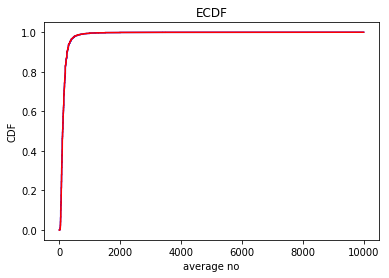

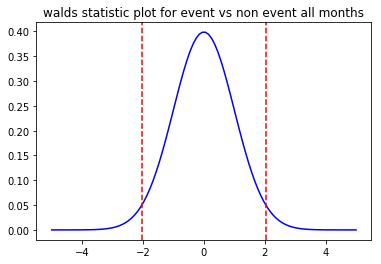

xmas vs prev non event month
walds statistic: -0.10023253953351732
p-value: 0.920159713273658
CI: (-1.8908856647983507, 1.7068951862827257)
Null Hypothesis Accepted
xmas vs all non event month
walds statistic: 1.3828260507708894
p-value: 0.1667182091667332
CI: (-0.5094550103661664, 2.9507697076317916)
Null Hypothesis Accepted
marathon vs noneventmonth
walds statistic: 0.8162593049993369
p-value: 0.41435184423026905
CI: (-1.0402180205782579, 2.5250202666720076)
Null Hypothesis Accepted
marathon vs all non event months
walds statistic: 2.2966392639013615
p-value: 0.021639356843582654
CI: (0.29683559732806897, 3.752908055015681)
Null Hypothesis Rejected


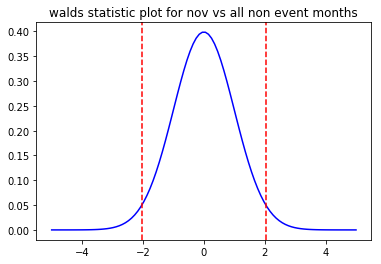

In [371]:
#event vs non event all months
print "event vs non event all months"
E = np.array(alleventprice,dtype=np.float32)
N_E = np.array(allnoneventprice,dtype=np.float32)
w = twopop_walds(E,N_E)
#E_x,E_y = ecdf_w(E)
#N_x,N_y = ecdf_w(N_E)
#pltcc(E_x,E_y,N_x,N_y)
waldsplot(w, "event vs non event all months")

#xmas vs prev non event month
print "xmas vs prev non event month"
A = np.array(xmasprice,dtype=np.float32)
B = np.array(xmasne_price,dtype=np.float32)
twopop_walds(A,B)

#xmas vs all non event months
print "xmas vs all non event month"
A = np.array(xmasprice_2,dtype=np.float32)
B = np.array(xmasne_price_2,dtype=np.float32)
twopop_walds(A,B)

#marathon vs noneventmonth
print "marathon vs noneventmonth"
A = np.array(marathonprice,dtype=np.float32)
B = np.array(marathone_price,dtype=np.float32)
twopop_walds(A,B)

#marathon vs all non event months
print "marathon vs all non event months"
A = np.array(marathonprice_2,dtype=np.float32)
B = np.array(marathone_price_2,dtype=np.float32)
twopop_walds(A,B)
waldsplot(w, "nov vs all non event months")




**Conclusion**<br>
1. At 5% level of significance, the data provides sufficient evidence that the average price of a listing varies during event months when compared to non event months.<br>
2. At 5% level of significance, the data provides sufficient evidence that the average price of a listing does not vary during xams month when compared to previous non event month (september).<br>
3. At 5% level of significance, the data provides sufficient evidence that the average price of a listing does not vary during marathon month when compared to previous non event month (september).<br>